In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFilter, ImageOps

In [2]:
def imshow(img):
    if img.ndim == 2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img[..., ::-1])
    plt.axis("off")
    plt.show()

In [10]:
foreground = cv2.imread("../../data/example/dog.jpg")
background = cv2.imread("../../data/example/add_local_light.png")
spec_range = cv2.imread("../../data/example/lab_table_mask.png")
foreground = cv2.resize(foreground, (256,256))
background = cv2.resize(background, (256,256))
spec_range = cv2.resize(spec_range, (256,256))

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[104 127 147]
  [ 98 120 143]
  [104 128 149]
  ...
  [116 128 136]
  [115 127 135]
  [115 128 136]]

 [[104 128 149]
  [102 126 148]
  [107 131 152]
  ...
  [114 126 134]
  [116 128 136]
  [115 128 136]]

 [[103 127 149]
  [105 129 151]
  [107 129 151]
  ...
  [111 124 132]
  [112 124 132]
  [114 127 135]]]


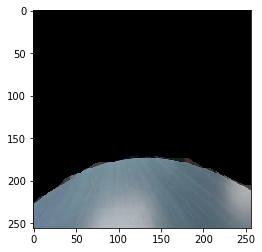

In [11]:
lower = np.array([0,230,0],dtype=np.uint8)
upper = np.array([180,255,255],dtype=np.uint8)
spec_mask = cv2.inRange(spec_range, lower, upper)
spec_bg = cv2.bitwise_and(background,background,mask=spec_mask)
plt.imshow(spec_bg)
print(spec_bg)
#　灰色は[160,160,160]

In [21]:
spec = spec_bg[:,:,0]!=0=1 
print(spec)

SyntaxError: can't assign to comparison (<ipython-input-21-af4b296f2bb3>, line 1)

In [ ]:
#grayscaleに変換する
gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

# 2値化する。
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
imshow(binary)

In [ ]:
# 輪郭抽出する。
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# 検出された輪郭内部を255で塗りつぶす。
mask = np.zeros_like(binary)
cv2.drawContours(mask, contours, -1, color=255, thickness=-1)

# 以上の手順で前景画像のうち、合成する画素を255としたマスク画像が作成できた。
imshow(mask)

In [ ]:
bgr = cv2.imread("../../data/example/dog.jpg")
bgr = cv2.cvtColor(bgr, cv2.COLOR_RGB2BGR)
h, w = bgr.shape[:2]
mask = np.zeros((h,w), dtype = np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect=(1,1,w,h)
cv2.grabCut(bgr, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
bgr2 = bgr*mask2[:,:,np.newaxis]
bgr2 = cv2.resize(bgr2, (256,256))

In [ ]:
plt.imshow(bgr2)

In [ ]:
#grayscaleに変換する
gray = cv2.cvtColor(bgr2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

In [ ]:
# 2値化する。
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

imshow(binary)

In [ ]:
# 輪郭抽出する。
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 検出された輪郭内部を255で塗りつぶす。
mask = np.zeros_like(binary)
cv2.drawContours(mask, contours, -1, color=(255,255,255), thickness=-1)

# 以上の手順で前景画像のうち、合成する画素を255としたマスク画像が作成できた。
mask = cv2.resize(mask, (256,256))
imshow(mask)

In [ ]:
def cv2pil(image_cv):
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
    image_pil = Image.fromarray(image_cv)
    image_pil = image_pil.convert('RGB')

    return image_pil

In [ ]:
foreground = Image.open("../../data/example/dog.jpg")
background = Image.open("../../data/example/lab_table_4_img_000230.png")
foreground = foreground.resize((256,256))
background = background.resize((256,256))

In [ ]:
mask_pil = cv2pil(mask)
mask_pil = ImageOps.invert(mask_pil)
mask_im = mask_pil.resize(foreground.size).convert("L")

back_im = background.copy()
x, y = random.randint(-64,128), random.randint(-64,128)
rate = np.random.rand()*0.5 + 0.5
rotate = random.randint(0,360)
foreground_ = foreground.resize((int(foreground.width*rate), int(foreground.height*rate))).rotate(rotate)
mask_im_ = mask_im.resize((int(mask_im.width*rate), int(mask_im.height*rate))).rotate(rotate)
back_im.paste(foreground_, (x, y), mask_im_)
print(rate)
print((x,y))

In [ ]:
plt.imshow(back_im)